# Probability Mass Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import nsfg
import pandas as pd

First we create a histogram of a list of values

In [2]:
data=[1,2,2,2,3,5,6]

hist = {}
for x in data:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 3, 3: 1, 5: 1, 6: 1}

After this we create another dictionary that maps each value to its probability

In [3]:
dataPMS={}
n=len(data)

for key in hist.keys():
    dataPMS[key]=hist[key]/n
    
dataPMS
    

{1: 0.14285714285714285,
 2: 0.42857142857142855,
 3: 0.14285714285714285,
 5: 0.14285714285714285,
 6: 0.14285714285714285}

To find the probability of a value for example 2 , do the following

In [4]:
dataPMS[2]

0.42857142857142855

<BarContainer object of 5 artists>

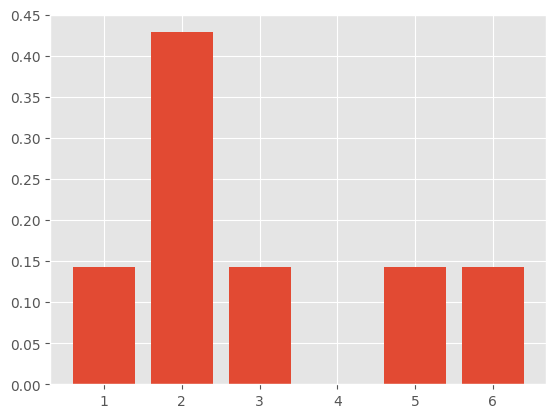

In [5]:
plt.style.use('ggplot')
plt.bar(dataPMS.keys(),dataPMS.values())

### Comparing PMF of First pregnancies vs Subsecuent Pregnancies

Text(0.5, 1.0, 'PMS of Pregnancy Lenght ,First Pregnancy vs Subsecuent Pregnancies')

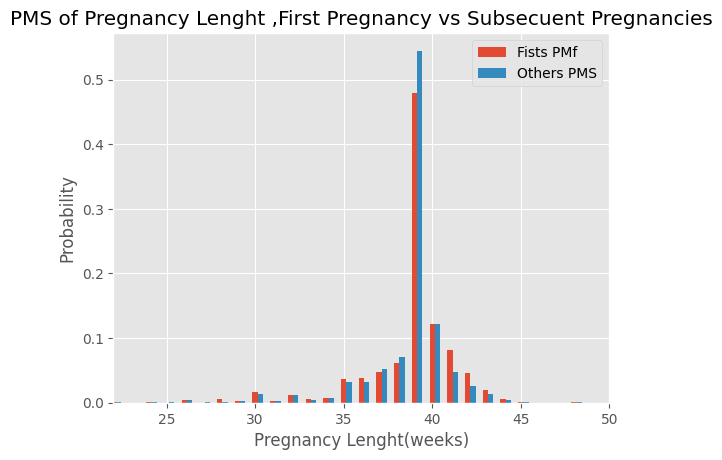

In [8]:
preg = nsfg.ReadFemPreg()
firsts=preg[preg["birthord"]==1]
others=preg[preg["birthord"]>1]

firstLength=firsts["prglngth"]
othersLength=others["prglngth"]

firstHist={}
othersHist={}

firstPMS={}
othersPMS={}

firstN=len(firstLength)
othersN=len(othersLength)

for item in firstLength:
    firstHist[item]=firstHist.get(item,0)+1

for item in othersLength:
    othersHist[item]=othersHist.get(item,0)+1
    
for item in firstHist.keys():
    firstPMS[item]=firstHist[item]/firstN
    
for item in othersHist.keys():
    othersPMS[item]=othersHist[item]/othersN

    
plt.bar(
    firstPMS.keys(),
    firstPMS.values(),
    width=0.3
)
plt.bar(
    [x+0.3 for x in list(othersPMS.keys())],
    othersPMS.values(),
    width=0.3
)

plt.xlim([22, 50])
plt.legend(["Fists PMf","Others PMS"])
plt.xlabel("Pregnancy Lenght(weeks)")
plt.ylabel("Probability")
plt.title("PMS of Pregnancy Lenght ,First Pregnancy vs Subsecuent Pregnancies")


    

In [ ]:
weeks=range(35,46)
diffs=[]

for week in weeks:
    p1=firstPMS[week]
    p2=othersPMS[week]
    diff=(p1-p2)*100
    diffs.append(diff)
    
plt.bar(weeks,diffs)
plt.xlabel("Pregnancy Length")
plt.ylabel("Percentage Difference between First Pregnancy and Subsecuent Pregnancies")
